<a href="https://colab.research.google.com/github/nuhi0517/Capstone-Project_2024/blob/main/Medical_Insurance_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Capstone_Project_Medical_Insurance_Price_Prediction

In [ ]:
!ls /content/drive/MyDrive/Capstone_Project_Medical_Insurance_Price_Prediction

This Project is based on Medical Insurance Price Prediction data available from kaggle repository.

(https://www.kaggle.com/code/dylandsi/medical-insurance-price-prediction)

1. It contains the details (e,g, age, sex, bmi etc.)of 2773 customers.
2. My project task is to create a machine learning model which can predict the average price of insurance based on its characteristics.
3. For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.

**Step 1: Reading the dataset**

In [4]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')


**Loading and Checking the Data:**

Load the data into a table using pandas, a tool for data analysis. Look at the first few rows to see what the data looks like and what kind of information it holds. Make sure there are no missing entries in the data. If there are any, you can either fill them in with appropriate values or remove parts of the data that are incomplete. Also, look for any odd or unusual data points that might need fixing.

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np

# Assuming the dataset file is named "MedicalInsuranceData.csv" and is located in the current directory
MedicalInsuranceData = pd.read_csv('Medical_insurance.csv')

# Printing the shape of the dataset before removing duplicates
print('Shape before deleting duplicate values:', MedicalInsuranceData.shape)

# Removing duplicate rows if any
MedicalInsuranceData = MedicalInsuranceData.drop_duplicates()

# Printing the shape of the dataset after removing duplicates
print('Shape After deleting duplicate values:', MedicalInsuranceData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
MedicalInsuranceData.head(10)



**Key observations from step 1 about Data Description**

1. The file contains 2773 medical details from the Medical Insurance dataset.
2. There are 7 attributes.
3. Attributes from the dataset are: **age, sex, bmi, children, smoker, region and charges.**
4. BMI- Body Mass Index.
5. Shape before deleting duplicate values: (2772, 7).
6. Shape after deleting duplicate values: (1337, 7).


**Step 2 : Problem Statement Definition**

Create a machine learning model that can guess how much individuals will spend on medical care based on factors like their age, gender, body weight, number of children, whether they smoke, and where they live. This model should help an insurance company decide how much to charge new customers by giving them a good idea of the potential health costs.



**Target variable identification**

In [ ]:
import pandas as pd

# Load the medical insurance dataset
insurance_data = pd.read_csv('/content/drive/MyDrive/Medical_insurance.csv')

# Check column names
print(insurance_data.columns)

# Inspect the dataset
print(insurance_data.head())

# Extract the target variable if the column name is correct
if 'charges' in insurance_data.columns:
    target_variable = insurance_data['charges']
    print(target_variable)
else:
    print("Column 'charges' not found in the dataset.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot the distribution of charges
sns.histplot(insurance_data['charges'], kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
insurance_data = pd.read_csv('/content/drive/MyDrive/Medical_insurance.csv')

# Data preprocessing
# Handle missing values, encode categorical variables, scale features if necessary

# Drop rows with missing values
insurance_data.dropna(inplace=True)

# Encode categorical variables
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split data into features and target variable
X = insurance_data.drop(columns=['charges'])  # Features
y = insurance_data['charges']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train regression models
# Example 1: Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Example 2: Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions
linear_regression_pred = linear_regression_model.predict(X_test_scaled)
random_forest_pred = random_forest_model.predict(X_test_scaled)

# Evaluate models
linear_regression_mse = mean_squared_error(y_test, linear_regression_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)

print('Linear Regression Mean Squared Error:', linear_regression_mse)
print('Random Forest Mean Squared Error:', random_forest_mse)


**Visualising the distribution of Target variable**

This code will make a chart (histogram) that displays how medical costs are spread out among the people in the dataset. You can change the number of categories (bins) and the color to make the chart clearer.

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the medical insurance dataset
insurance_data = pd.read_csv('Medical_insurance.csv')

# Define numerical and categorical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']
categorical_columns = ['sex', 'smoker', 'region']

# Explore the distributions of variables through visualizations
# Histograms for numerical variables
insurance_data[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=insurance_data[numerical_columns])
plt.title('Box Plots of Numerical Variables', fontsize=16)
plt.show()

# Scatter plot for BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_data)
plt.title('Scatter Plot of BMI vs. Charges', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Investigate correlations between numerical variables
correlation_matrix = insurance_data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

# Box plots for numerical and categorical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=insurance_data[numerical_columns + categorical_columns])
plt.title('Box Plots of Numerical and Categorical Variables', fontsize=16)
plt.show()

**Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)**

1. If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
2. Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
3. When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
4. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have loaded the medical insurance dataset into a variable named 'insurance_data'
# Replace 'insurance_data' with the appropriate variable name if it's different
insurance_data['charges'].hist()
plt.title('Distribution of Medical Expenses (Charges)')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.show()

**Observations from step 4**

1. The way the target variable is spread out in the data is good enough to continue.
2. There are enough examples of each type of value for effective learning.

**Step 5: Data exploration at basic level**

1. This step is performed to guage the overall data.
2. The volume of data, the types of columns present in the data.
3. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
4. This step helps to start the column/data rejection process.
5. For example in this dataset, you will ask, does this column affect the price of the house?
6. If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
7. There are four commands which are used for Basic data exploratory Analysis in Python:
* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous




In [ ]:
# Looking at sample rows in the data
insurance_data.head()

In [ ]:
# Looking at sample rows in the data
insurance_data.tail()

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
insurance_data.info()

In [ ]:
# Looking at the descriptive statistics of the data
insurance_data.describe(include='all')

In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
insurance_data.nunique()

**Observations from step 5**

* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.
* The selected columns in this step are not final, further study will be done and then a final list will be created.
*   age - Continuous. Selected.
*   sex - Categorical. Selected.
*   bmi - Continuous. Selected.
*   children - Categorical. Selected.
*  smoker - Categorical. Selected.
*  region - Categorical. Selected.
* charges - Continuous. Selected. This is the Target or Class Variable, which needs to be predicted by the proposed regression model!




**Step 6: Identifying and Rejecting useless columns**

1. There are no qualitative columns in the data.
2. Hence no need to remove any column.


**Step 7: Visual Exploratory Data Analysis of data (with Histogram
and Barcharts)**

1. Visualize distribution of all the Categorical Predictor variables in the data using bar plots.
2. We can spot a categorical variable in the data by looking at the unique values in them.
3. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
4. Based on the Basic Exploration Data Analysis in the previous step, we could spotted two categorical predictors in the data
5. Categorical Predictors:
*   'sex'
*   'children'
*   'smoker'
*   'region'
6. We will use bar charts to see how the data is distributed for these categorical columns.

In [16]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [ ]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=insurance_data, colsToPlot=['sex','children','smoker','region'])

**Observations from step 7**

1. Bar charts help analyze data by showing different categories on the X-axis and their frequencies on the Y-axis.
2. In an ideal scenario, each category would have a similar number of instances, making the data useful for machine learning algorithms.
3. A bar chart that is skewed, where one category dominates over others, indicates an imbalance that might not be helpful for building machine learning models.
4. As we move into analyzing correlations, we can decide whether to keep or remove such imbalanced data attributes.
5. Notably, the "sex" and "smoker" categories in the dataset are biased, with one category significantly outnumbering the other.
6. These skewed categories may not provide valuable information for predicting the target variable since the imbalance doesn't offer diverse data for the algorithms to learn from.
7. We've selected 'sex', 'children', 'smoker', and 'region' as some of the categorical variables to examine further. Two of these will be analyzed in more detail to understand their impact on the model.









**Step 8: Now Visualize distribution of all the Continuous Predictor variables in the data using
histograms**

Based on the Basic Exploratory Data Analysis, there are three continuous predictor variables 'age', 'bmi', 'charges'.

In [ ]:
# Plotting histograms of multiple columns together
insurance_data.hist(['age', 'bmi', 'charges'], figsize=(18,10))

**Observations from step 8**

1. Histogram Interpretation
2. Each histograms shows us the data distribution for a single continuous variable.
3. The X-axis shows the range of values and Y-axis represent the number of values in that range.
4. For example, in the above histogram of "AGE", there are around 200 rows in data that has age value between 90 to 100.
5. The age histogram does not display a bell curve; instead, it shows a relatively even distribution across different age groups until it declines sharply after age 60.
6. The BMI histogram is bell-shaped but leans right, concentrating in the mid to high range, while the Charges histogram is significantly right-skewed, common in financial data where many observations are low and few are high.
7. If there is too much skewness, then outlier removal treatment should be done and the column should be re-examined, and if that also does not solve the problem then only reject the column/data attribute.
8. Selected Continuous Variables:
* age
* bmi  
* charges  







**Feature Selection based on data distribution**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
insurance_data = pd.read_csv('Medical_insurance.csv')

# Visualize data distributions
plt.figure(figsize=(12, 8))
sns.histplot(insurance_data['age'], kde=True, color='blue', bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
insurance_data = pd.read_csv('Medical_insurance.csv')

# Perform one-hot encoding for categorical variables
categorical_columns = ['sex', 'smoker', 'region']  # Ensure column names are lowercase
insurance_data_encoded = pd.get_dummies(insurance_data, columns=categorical_columns)

# Define features and target variable
X = insurance_data_encoded.drop(columns=['charges'])  # Features
y = insurance_data_encoded['charges']  # Target variable

# Use statistical tests to determine feature importance
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Feature Importance Scores:")
print(feature_scores)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Importance Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

# Select top k features based on importance scores
k = 5  # Example: Select top 5 features
selected_features = feature_scores['Feature'].head(k).tolist()
print("Selected Features:", selected_features)

# Train a machine learning model using selected features
X_selected = X[selected_features]
model = RandomForestRegressor()
model.fit(X_selected, y)


**Step 9: Outlier Analysis**

1. Outliers are extreme values in the data which are far away from most of the values.
2. You can see them as the tails in the histogram.
3. Outlier must be treated one column/data attribute at a time.
4. As the treatment will be slightly different for each column.
5. Outliers bias the building of machine learning models.
6. As the algorithm tries to fit the extreme value, it goes away from majority of the data.
7. Outlined below are two options to treat outliers in the data.
8. Option-1: Delete the outlier Records. Only if there are just few rows lost.
9. Option-2: Impute the outlier values with a logical business value.
10. Let us find out the most logical value to be replaced in place of outliers by looking at the histogram.


In [ ]:
#Replacing outliers for 'charges'
# Finding nearest values to 6500 mark
insurance_data[insurance_data['charges']<6500].sort_values(by='charges',ascending=False)

Observation: Above result shows the nearest logical value is 6496.8860, hence, replacing any value above 6500 with it.



In [22]:
# Replacing outliers with nearest possibe value
insurance_data['charges'][insurance_data['charges']>6500] =6496.8860

**Step 10: Removal of Outliers and Missing Values**


In [ ]:
insurance_data.hist(['charges'], figsize=(18,5))

**Observations from step 10**

1. The distribution has improved after the outlier treatment.
2. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.


**Step 11: Missing Value Analysis**

1. Missing values are treated for each column separately.
2. If a column has more than 30% data missing, then missing value treatment cannot be done.
3. That column must be rejected because too much information is missing.
4. Outlined below are some options for treating missing values in data.
5. Delete the missing value rows if there are only few records.
6. Impute the missing values with MEDIAN value for continuous variables.
7. Impute the missing values with MODE value for categorical variables.
8. Interpolate the values based on nearby values.
9. Interpolate the values based on business logic.

In [ ]:
# Finding how many missing values are there for each column
insurance_data.isnull().sum()

**Observations from step 11**

1. No missing values in this data!
2. So no removal of any data samples(rows) is needed.

**Step 12: Feature Selection (Attribute Selection)**

1. Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
2. This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
3. However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.
4. Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.
* **Visual exploration of relationship between variables**
1. Continuous Vs Continuous ---- Scatter Plot
2. Categorical Vs Continuous---- Box Plot
3. Categorical Vs Categorical---- Grouped Bar Plots
4. Statistical measurement of relationship strength between variables
5. Continuous Vs Continuous ---- Correlation matrix
6. Categorical Vs Continuous---- ANOVA test
7. Categorical Vs Categorical--- Chi-Square test
* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**
1. Continuous Target Variable Vs Continuous Predictor
2. Continuous Target Variable Vs Categorical Predictor



**Relationship exploration: Continuous Vs Continuous -- Scatter Charts**

* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.



In [ ]:
ContinuousCols=['age','bmi']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
   insurance_data.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

**Scatter Charts Interpretation**

1. Scatter charts help us see how two things relate to each other.
2. Increasing Trend: When the points go up from left to right, it shows a positive relationship. This means when one thing increases, the other one tends to increase too. This is useful in machine learning because it can help predict future trends.
3. Decreasing Trend: If the points go down from left to right, it shows a negative relationship. In this case, when one thing increases, the other decreases. This information is also useful for building machine learning models.
4. No Trend: If the points don't show any clear pattern, it means there's no strong relationship between the two variables. This suggests that using this variable to predict something in machine learning might not work well.
5. By looking at the scatter chart, we can understand if a variable might be helpful for predictions. To be more sure, we check the correlation value next.




**Step 13: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

1. Pearson's correlation coefficient is a powerful metric for doing this.
2. It can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator):

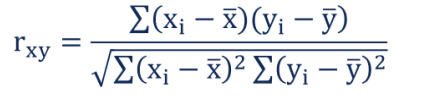


3. This value can be calculated only between two numeric columns. Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend.
4. Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend.
5. Correlation near {0} means No relationship, the scatter plot will show no clear trend.
6. If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter.
7. We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

In [26]:
# Calculating correlation matrix
ContinuousCols=['age', 'charges', 'bmi',]

In [ ]:
# Creating the correlation matrix
CorrelationData=insurance_data[ContinuousCols].corr()
CorrelationData

In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.5 ]

**Observations from step 13**

1. Final selected Continuous columns:
2. 'age'

**Step 14: Relationship exploration: Categorical Vs Continuous -- Box Plots**

* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots, and
* Measure the strength of relation using Anova test.



In [ ]:
# Box plots for continuous Target Variable "charges" and Categorical predictors
CategoricalColsList=['sex', 'children', 'smoker', 'region']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    insurance_data.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

**Observations from step 14**

1. These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.
2. If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.
3. On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.
4. For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below.



**Step 15: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

1. Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.
2. Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
3. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable).
4. ANOVA Test result: Probability of H0 (Null Hypothesis being true.


In [30]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['sex', 'children', 'smoker', 'region']
FunctionAnova(inpData=insurance_data,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

**Observations from step 15**

1. The results of ANOVA confirm our visual analysis using box plots above.
2. All categorical variables are correlated with the Target variable except 'sex'.
3. This is something we can guess by looking at the box plots!
4. Final selected Categorical columns:

'children', 'smoker', 'region'

**Selecting final Predictors/Features for building Machine Learning/AI model**

* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* 'age', 'children', 'smoker', 'region'




In [ ]:
SelectedColumns=['age', 'children', 'smoker', 'region']

# Selecting final columns
DataForML=insurance_data[SelectedColumns]
DataForML.head()

In [33]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

**Step 16: Data Pre-processing for Machine Learning Model Building or Model Development**
1. List of steps that needs to be performed on predictor variables before data can be used for machine learning.
2. Converting each Ordinal Categorical columns to numeric.
3. Converting Binary nominal Categorical columns to numeric using 1/0 mapping.
4. Converting all other nominal categorical columns to numeric using pd.get_dummies().
5. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks.
6. Converting the ordinal variable to numeric - In this data there. is no Ordinal categorical variable.
7. Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data.



**Converting the nominal variable to numeric using get_dummies()**



In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['charges']=insurance_data['charges']

# Printing sample rows
DataForML_Numeric.head()

**Step 17: Machine Learning Model Development:**

1. Splitting the data into Training and Testing sample.
2. We dont use the full data for creating the model (training data).
3. Some data is randomly selected and kept aside for checking how good the model is.
4. This is known as Testing Data and the remaining data is called Training data on which the model is built.
5. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

In [36]:
#Separate Target Variable and Predictor Variables
TargetVariable='charges'
Predictors=['age', 'children', ]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

**Step 18: Standardization/Normalization of data**

1. we can choose not to run this step if we want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step).
2. However, if we are using KNN or Neural Networks, then this step becomes necessary.

In [37]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

**Step 19: Multiple Linear Regression Algorithm For ML/AI model building**



In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
import numpy as np

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Decision Tree Regressor**

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Plotting/Visualising the Decision Tree**

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in

**Random Forest Regressor**

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Plotting One of the Decision Tree in Random Forest Regressor**

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in

**Step 20: AdaBoost Algorithm For ML/AI model building**

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**XGBoost Regressor**

In [ ]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
 TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Plotting a single Decision tree out of XGBoost**

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

**K-Nearest Neighbor(KNN)**

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Support Vector Machine (SVM) Regressor**

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Step 21: Model Deployment**

1. Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.
2. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.
3. I am choosing XGboost as the final model it has the highest accuracy!
4. In order to deploy the model we follow steps outlined next.
5. Train/Build the model again using 100% data available.
6. Save the model as a serialized file which can be stored anywhere.
7. Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction.
8. Choosing only the most important variables
9. Its beneficial to keep lesser number of predictors for the model while deploying it in production.
10. The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.
11. This is especially crucial when there are many different predictor columns or features in the data.
12. For this dataset, 'age' and 'children' are the most important predictors. They consistently rank highest in importance across all algorithms used. Therefore, using these variables as the primary predictors will likely improve the accuracy of the house price prediction system.


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'children']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

**Cross validating the final model accuracy with less predictors**

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=6,
                      learning_rate=0.7,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Retraining the final model using 100% data**

In [51]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

**Save the model as a serialized file which can be stored anywhere**

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

**Create a python function**

In [53]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'children']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

**Calling the function for some new data**

In [ ]:
import pandas as pd

# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['age', 'children']

    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData)

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

# Define the new sample data
NewSampleData = pd.DataFrame(data=[[21, 0], [28, 3]], columns=['age', 'children'])

# Call the function to predict on the new data
prediction_result = FunctionPredictResult(NewSampleData)

# Print the prediction result
print(prediction_result)


**Conclusion**

1. The FunctionPredictResult() is designed to make predictions for one or multiple new cases at once.
2. Therefore, you can set it up to run automatically every night through a batch job or cron job, to handle all the house price predictions needed in the system.




**Deploying a predictive model as an API**

1. Django and Flask are common tools for setting up predictive models on a web service.
2. You can access your predictive models through a web address from any interface, such as Tableau, Java, or AngularJS.


**Deploying the model with few parameters**

**Function for predictions API**

In [55]:
import pandas as pd
import pickle

# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['age', 'children']

    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData)

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age, inp_children):
    # Creating a DataFrame for the model input
    SampleInputData = pd.DataFrame(data=[[inp_age, inp_children]], columns=['age', 'children'])

    # Calling the function defined above using the input parameters
    Predictions = FunctionPredictResult(InputData=SampleInputData)

    # Returning the predictions
    return Predictions.to_json()

# Function call
result = FunctionGeneratePrediction(inp_age=21, inp_children=0)
print(result)

{"Prediction":{"0":6496.8862304688,"1":6496.8862304688,"2":6496.8862304688,"3":6496.8862304688,"4":6496.8862304688,"5":6496.8862304688,"6":6496.8862304688,"7":6496.8862304688,"8":6496.8862304688,"9":6496.8862304688,"10":6496.8862304688,"11":6496.8862304688,"12":6496.8862304688,"13":6496.8862304688,"14":6496.8862304688,"15":6496.8862304688,"16":6496.8862304688,"17":6496.8862304688,"18":6496.8862304688,"19":6496.8862304688,"20":6496.8862304688,"21":6496.8862304688,"22":6496.8862304688,"23":6496.8862304688,"24":6496.8862304688,"25":6496.8862304688,"26":6496.8862304688,"27":6496.8862304688,"28":6496.8862304688,"29":6496.8862304688,"30":6496.8862304688,"31":6496.8862304688,"32":6496.8862304688,"33":6496.8862304688,"34":6496.8862304688,"35":6496.8862304688,"36":6496.8862304688,"37":6496.8862304688,"38":6496.8862304688,"39":6496.8862304688,"40":6496.8862304688,"41":6496.8862304688,"42":6496.8862304688,"43":6496.8862304688,"44":6496.8862304688,"45":6496.8862304688,"46":6496.8862304688,"47":649

In [ ]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age , inp_children):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age , inp_children]],
     columns=['age' , 'children'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_age=21,
                           inp_children=0,
                             )

**Web Deployment using Flask Library/Package**

**Installing the flask library required to create the API**

In [ ]:
!pip install flask

**Creating Flask API**

In [58]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [59]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        age_value = float(request.args.get('age'))
        children_value=float(request.args.get('children'))


        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_age=age_value,
                                                       inp_children=children_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

**Starting the API engine**

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

**"Sample URL to call the API Copy and paste below URL in the web browser http://127.0.0.1:9000/prediction_api?LSTAT=4.9&RM=6.5&PTRATIO=15.3"**



**Desktop App deployment: Tkinter package**

1. This won't work on Google Colab.
2. Need to use PyCharm to run the code.
3. Need to include the data file named Medical_insurance.csv.




In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd

class InsuranceApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Insurance Data Options')

        # Load the data from the CSV file
        self.data = pd.read_csv('Medical_insurance.csv')

        # Setup GUI layout
        self.setup_gui()

    def setup_gui(self):
        # Button to show 'Final Price' only
        final_price_button = ttk.Button(self.master, text="1. Final Price", command=self.show_final_price)
        final_price_button.pack(fill=tk.X, padx=5, pady=5)

        # Button to show entire dataset
        dataset_button = ttk.Button(self.master, text="2. Insurance Dataset", command=self.show_dataset)
        dataset_button.pack(fill=tk.X, padx=5, pady=5)

        # Button to exit the application
        exit_button = ttk.Button(self.master, text="3. Exit", command=self.master.quit)
        exit_button.pack(fill=tk.X, padx=5, pady=5)

        # Treeview for displaying data
        self.tree = ttk.Treeview(self.master)
        self.tree.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)

    def show_final_price(self):
        # Clear the treeview
        self.tree.delete(*self.tree.get_children())

        # Configuring columns for 'Final Price'
        self.tree['columns'] = ['Final Price']
        self.tree['show'] = 'headings'
        self.tree.heading('Final Price', text='Final Price')

        # Inserting 'Final Price' data
        for index, row in self.data.iterrows():
            self.tree.insert("", "end", values=[row['charges']])

    def show_dataset(self):
        # Clear the treeview
        self.tree.delete(*self.tree.get_children())

        # Configuring columns for the entire dataset
        self.tree['columns'] = list(self.data.columns)
        self.tree['show'] = 'headings'
        for col in self.data.columns:
            self.tree.heading(col, text=col)

        # Inserting dataset into the treeview
        for index, row in self.data.iterrows():
            self.tree.insert("", "end", values=list(row))

if __name__ == '__main__':
    root = tk.Tk()
    app = InsuranceApp(root)
    root.mainloop()

## **Completion of programming project**